In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ship = pd.read_csv("/Users/shenchingfeng/Downloads/ship_information.csv")
ship.head(10)
ship.info()


,PassengerId,Repurchase,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S
5,6,0,3,male,0,0,8.4583,Q
6,7,0,1,male,0,0,51.8625,S
7,8,0,3,male,3,1,21.0750,S
8,9,1,3,female,0,2,11.1333,S
9,10,1,2,female,1,0,30.0708,C


In [12]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Repurchase   891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


/Users/shenchingfeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Repurchase', ylabel='count'>

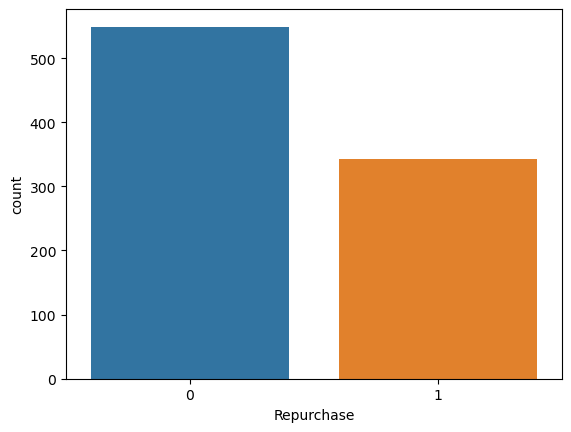

In [15]:
sns.countplot(ship['Repurchase'])

<AxesSubplot:xlabel='Pclass'>

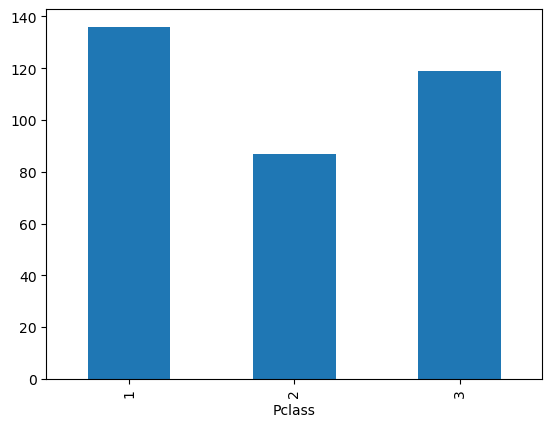

In [21]:
ship.groupby('Pclass').Repurchase.sum().plot(kind = 'bar')

In [22]:
pclass = ship.groupby('Pclass').Repurchase.sum() #各階級回購量
rpc = ship.Repurchase.sum() #總回購數
print(pclass/rpc) 

Pclass
1    0.397661
2    0.254386
3    0.347953
Name: Repurchase, dtype: float64


<AxesSubplot:ylabel='Pclass'>

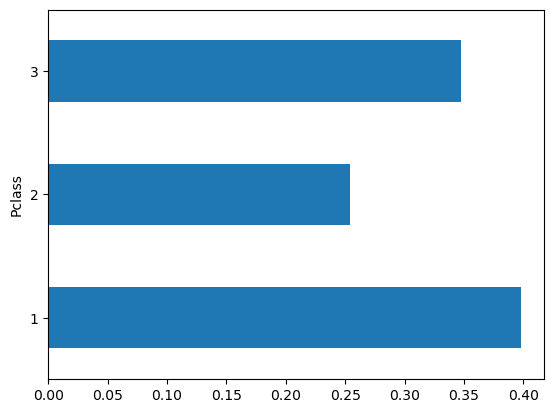

In [103]:
# % of Repurchase
(pclass/rpc).plot(kind = 'barh') # 由階級決定回購率

<AxesSubplot:ylabel='Pclass,Sex'>

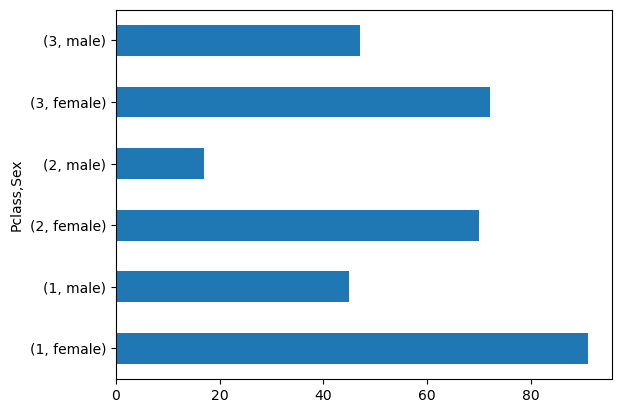

In [27]:
ship.groupby(['Pclass', 'Sex']).Repurchase.sum().plot(kind = 'barh')

In [40]:
rpc_total = pd.crosstab([ship.Pclass, ship.Sex], ship.Repurchase)
rpc_total

Repurchase       0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

In [64]:
rpc_total.sum(0) 

Repurchase
0    549
1    342
dtype: int64

In [65]:
rpc_total.sum(1)

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [95]:
ship[['Sex', 'Repurchase']]

,Sex,Repurchase
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


<AxesSubplot:xlabel='Sex'>

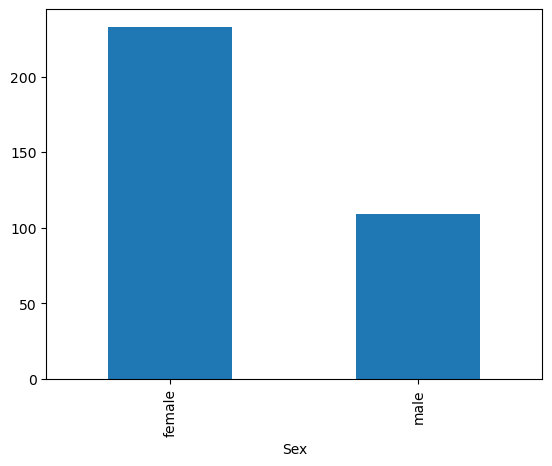

In [98]:
ship.groupby('Sex').Repurchase.sum().plot(kind = 'bar')

<AxesSubplot:ylabel='Sex'>

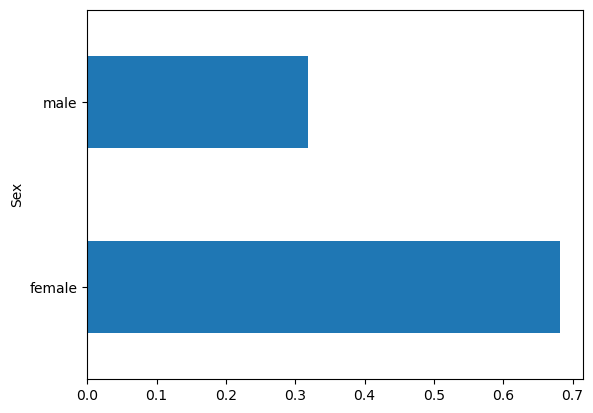

In [101]:
# 由性別決定回購率
bysex = ship.groupby('Sex').Repurchase.sum()
(bysex/rpc).plot(kind = 'barh')

<AxesSubplot:ylabel='Pclass,Sex'>

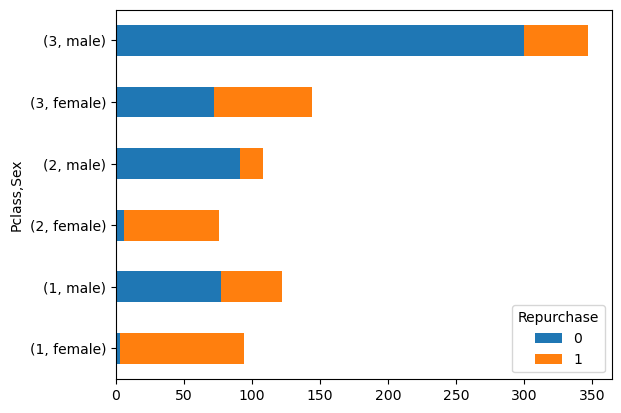

In [41]:
rpc_total.plot(kind = 'barh', stacked = True)

<AxesSubplot:ylabel='Pclass,Sex'>

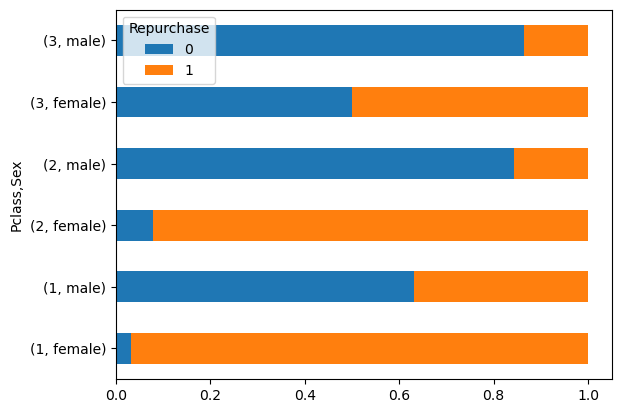

In [80]:
per_class = rpc_total.div(rpc_total.sum(1),axis = 0)
per_class.plot(kind = 'barh', stacked = True)

<AxesSubplot:ylabel='Repurchase'>

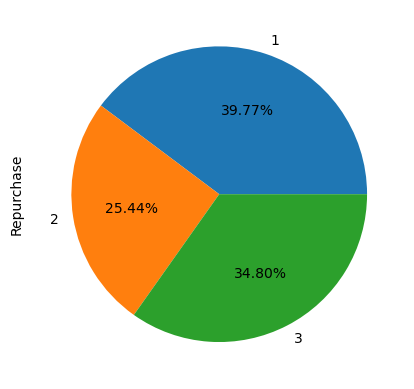

In [42]:
ship.groupby('Pclass').Repurchase.sum().plot(kind = 'pie', autopct = '%.2f%%')

<AxesSubplot:xlabel='Embarked'>

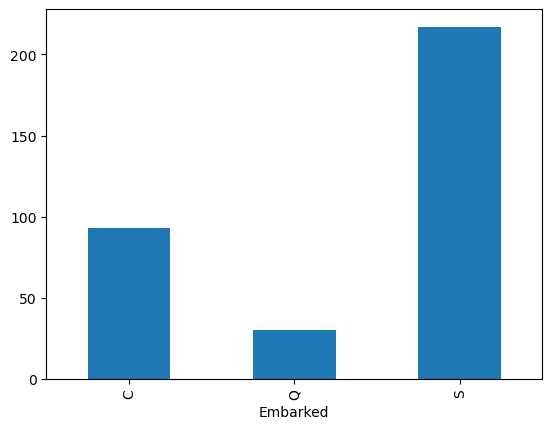

In [37]:
ship.groupby('Embarked').Repurchase.sum().plot(kind = 'bar')

<AxesSubplot:ylabel='Repurchase'>

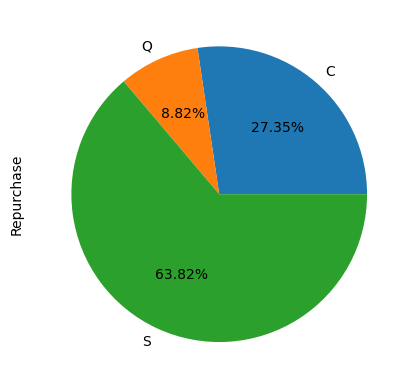

In [82]:
# 回購數據中，各港口回購數
ship.groupby('Embarked').Repurchase.sum().plot(kind = 'pie',autopct = '%.2f%%')

In [85]:
byemb = ship.groupby('Embarked').Repurchase.sum()
rpc = ship.Repurchase.sum()
print(byemb/rpc)

Embarked
C    0.271930
Q    0.087719
S    0.634503
Name: Repurchase, dtype: float64


<AxesSubplot:ylabel='Repurchase'>

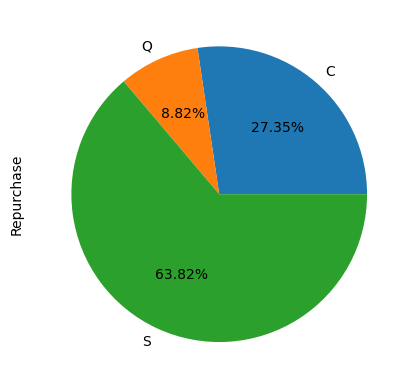

In [88]:
(byemb/rpc).plot(kind = 'pie',autopct = '%.2f%%')

In [51]:
ship.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:>

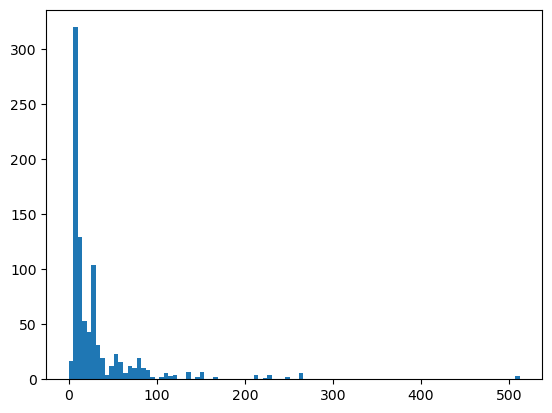

In [59]:
ship.Fare.hist(bins = 100, grid = False)

In [105]:
fare = ship.groupby('Fare').Repurchase.sum()
rpc = ship.Repurchase.sum()
print(fare/rpc)

Fare
0.0000      0.002924
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.008772
247.5208    0.002924
262.3750    0.005848
263.0000    0.005848
512.3292    0.008772
Name: Repurchase, Length: 248, dtype: float64


<AxesSubplot:>

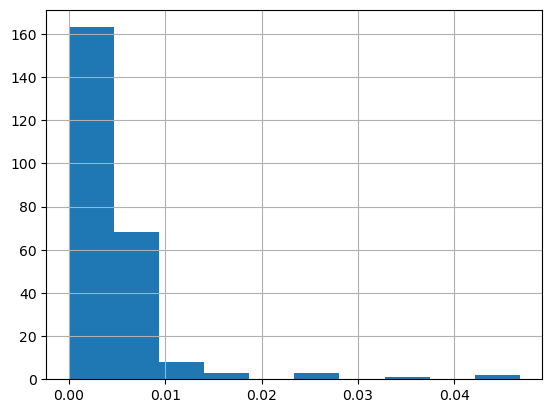

In [63]:
(fare/rpc).hist()

<AxesSubplot:xlabel='SibSp'>

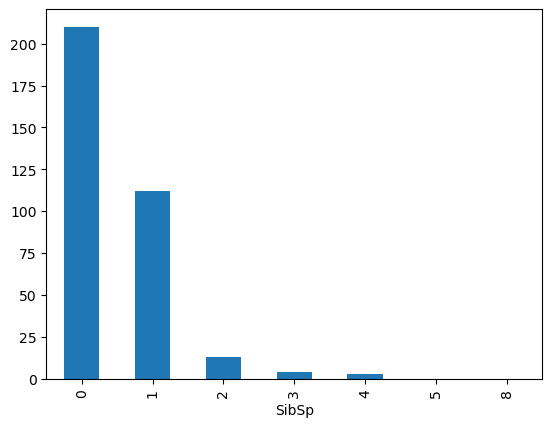

In [89]:

ship.groupby('SibSp').Repurchase.sum().plot(kind = 'bar')

In [106]:
byss = ship.groupby('SibSp').Repurchase.sum()
print(byss / rpc)

SibSp
0    0.614035
1    0.327485
2    0.038012
3    0.011696
4    0.008772
5    0.000000
8    0.000000
Name: Repurchase, dtype: float64


In [1]:
(byss / rpc).plot(kind = 'barh')  #手足配偶人數越少，回購率越高

NameError: name 'byss' is not defined